# Part 1 - Data Handling

First, we will focus on manipulating data within Python. The package we shall be using to do this is `pandas`, which provides data structures and operations for manipulating many common types of data.

Another popular package for these sort of tasks is `numpy`, which is particularly useful when performing more computationally involved operations on your data. 

## Overall Agenda:

Data profiling → Categorical cleaning & Numeric cleaning → Missing‑data strategy → Validation → Feature engineering.

## Useful References

There are many resources that you may find useful for using `pandas`, here are a few:

- The `pandas` [documentation](https://pandas.pydata.org/docs/reference/index.html) - Contains reference information for all pandas objects, functions and methods.
- The [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) - I find this very helpful as a reference when I want to look up how to perform a particular kind of task, rather than wanting to look up a specific function. It is only introductory so does not by any stretch cover everything, but what it does cover it covers well. It also contains material on `numpy`, `matplotlib` & `seaborn` (two packages commonly used together for data visualisation, and which we will cover), and `scikit-learn` (an accessible package for doing basic Machine Learning in Python). 

## Installing Pandas

The module `pandas` does not come as part of the default Python or Jupyter installations. In order to install it in your system, launch the Command Prompt just like we saw in week 0 and run the following command: `pip install pandas --user`. Once the command finishes execution, pandas will be installed in your system.

**Note**: If you have any issues installing pandas, please get in touch with one of the trainers or use the teams page.

**Note**: You can use the same approach to install `numpy`, and other packages.

## Loading pandas

Pandas is typically imported with the alias `pd`.

import pandas as pd


## Reading in Data 

The first step in any data analysis is to read in your data. 

Pandas contains different functions for reading in data from different formats. The function for reading in data from a csv file is `read_csv()`.

In [277]:
import pandas as pd
import numpy as np

# Load the corrupted files, skipping the comment lines
mem_dirty = pd.read_csv('../data/nus_mem_corrupted.csv', 
#                       skiprows=2,        # Skip first 2 comment lines
                       engine='python')   # Better handling of quotes) # Skip any remaining bad lines

cei = pd.read_csv('../data/nus_cei.csv')

**Note:** You will need to replace 'nus_mem_corrupted.csv' and 'nus_cei_corrupted.csv' with the file paths where you’ve stored the CSV files. Be aware that the copy path functionality in windows pastes in file paths with back slashes \, but pandas requires forward slashes /. Alternatively, you can put an r in front of the string, e.g. pd.read_csv(r"C:\Documents\metabric_clinical_and_expression_data.csv").

The type of object the metabric dataset is now stored as is called a DataFrame. Typically the rows of a data frame correspond to **observations**, and the columns correspond to **variables**. 

By default, pandas will assign each row an index starting from 0, as is standard in Python.

## Exploring Our Data

### A Refresher on Objects, Attributes and Methods

Recall that objects in Python have **attributes** and **methods**.

An **attribute** is simply a property of the object. They can be accessed via the syntax `object.attribute`.

For example, the `shape` attribute of a data frame contains information on the number of rows and columns.

In [278]:
mem_dirty.shape

(30319, 67)

In [279]:
cei.shape

(9977, 517)

The `columns` attribute gives a list of the variables in the data frame.

In [280]:
mem_dirty.columns.tolist()

['Unnamed: 0',
 'RELT_TO_HD',
 'AGE',
 'MARITAL_ST',
 'ACTIVITY_ST',
 'HQA',
 'LVL_OF_EDN',
 'SSOC_1D',
 'ID_TYPE',
 'TENANCY',
 'HSE_TYPE',
 'NUM_MAID',
 'EMPLOYMENT_ST',
 'HREF_NO',
 'PI_NO',
 'SP_PI_NO',
 'MO_PI_NO',
 'FA_PI_NO',
 'EXPN_FAC',
 'SEX',
 'MIE_EXC_NAV_IND',
 'HSZ',
 'NUM_WRK_PERS_INC_STUD',
 'RETIREE60_HH',
 'RETIREE65_HH',
 'HLA',
 'HH_YNGCH',
 '_DRBLE01',
 '_DRBLE12',
 '_DRBLE13',
 '_DRBLE16',
 '_DRBLE34',
 '_DRBLE19',
 '_DRBLE20',
 '_DRBLE35',
 '_DRBLE26_27_28',
 '_DRBLE40',
 '_DRBLE06',
 '_DRBLE39',
 '_DRBLE07',
 '_DRBLE08',
 '_DRBLE09',
 '_DRBLE10_41',
 '_DRBLE29_41',
 '_DRBLE41',
 '_DRBLE11',
 '_DRBLE38',
 '_DRBLE15',
 '_DRBLE21',
 '_DRBLE32',
 '_DRBLE36',
 '_DRBLE37',
 'HH_TINC_RCPF_GTRF_E_NAV',
 'HH_TINC_GTRF_E_NAV',
 'PC_HH_TINC_RCPF_GTRF_E_NAV',
 'PC_HH_TINC_GTRF_E_NAV',
 'HH_WRK_INC_RCPF',
 'PC_HH_WRK_INC_RCPF',
 'HH_PAID_EMP_INC_RCPF',
 'HH_SELF_EMP_INC',
 'HH_RENT_INC',
 'HH_INVEST_INC',
 'HH_GOVT_INC',
 'HH_TRANSFER_INC',
 'HH_CONTRIBUTIONS_INC',
 'HH_OTH_

In [281]:
# cei.columns.tolist()

In [282]:
# Create a new DataFrame without that column
# mem_dirty = mem_dirty.drop('Unnamed: 0', axis=1)

In [283]:
mem_dirty.columns

Index(['Unnamed: 0', 'RELT_TO_HD', 'AGE', 'MARITAL_ST', 'ACTIVITY_ST', 'HQA',
       'LVL_OF_EDN', 'SSOC_1D', 'ID_TYPE', 'TENANCY', 'HSE_TYPE', 'NUM_MAID',
       'EMPLOYMENT_ST', 'HREF_NO', 'PI_NO', 'SP_PI_NO', 'MO_PI_NO', 'FA_PI_NO',
       'EXPN_FAC', 'SEX', 'MIE_EXC_NAV_IND', 'HSZ', 'NUM_WRK_PERS_INC_STUD',
       'RETIREE60_HH', 'RETIREE65_HH', 'HLA', 'HH_YNGCH', '_DRBLE01',
       '_DRBLE12', '_DRBLE13', '_DRBLE16', '_DRBLE34', '_DRBLE19', '_DRBLE20',
       '_DRBLE35', '_DRBLE26_27_28', '_DRBLE40', '_DRBLE06', '_DRBLE39',
       '_DRBLE07', '_DRBLE08', '_DRBLE09', '_DRBLE10_41', '_DRBLE29_41',
       '_DRBLE41', '_DRBLE11', '_DRBLE38', '_DRBLE15', '_DRBLE21', '_DRBLE32',
       '_DRBLE36', '_DRBLE37', 'HH_TINC_RCPF_GTRF_E_NAV', 'HH_TINC_GTRF_E_NAV',
       'PC_HH_TINC_RCPF_GTRF_E_NAV', 'PC_HH_TINC_GTRF_E_NAV',
       'HH_WRK_INC_RCPF', 'PC_HH_WRK_INC_RCPF', 'HH_PAID_EMP_INC_RCPF',
       'HH_SELF_EMP_INC', 'HH_RENT_INC', 'HH_INVEST_INC', 'HH_GOVT_INC',
       'HH_TRANSFER_INC', 

### Using dictionaries for renaming columns

In [284]:

# ----------------
# Column renaming mapping based on HES 2023 Annex A definitions
# ----------------

# MEM dataset: demographic and household member variables
col_rename_mem = {
    'RELT_TO_HD': 'Relationship_to_Household_Reference_Person',
    'AGE': 'Age_Category',
    'MARITAL_ST': 'Marital_Status',
    'ACTIVITY_ST': 'Activity_Status',
    'HQA': 'Highest_Qualification_Achieved',
    'LVL_OF_EDN': 'Level_of_Education',
    'SSOC_1D': 'Singapore_Standard_Occupation_Classification_1D',
    'ID_TYPE': 'Identification_Document_Type',
    'TENANCY': 'Tenancy_Type',
    'HSE_TYPE': 'Household_Type',
    'NUM_MAID': 'Number_of_Maids',
    'EMPLOYMENT_ST': 'Employment_Status',
    'EXPN_FAC': 'Expansion_Factor',
    'HREF_NO': 'Household_Reference_Number',
    'PI_NO': 'Person_Identifier_Number',
    # add additional mappings
}

# Apply renaming
mem_dirty = mem_dirty.rename(columns=col_rename_mem)

In [285]:
mem_dirty.columns

Index(['Unnamed: 0', 'Relationship_to_Household_Reference_Person',
       'Age_Category', 'Marital_Status', 'Activity_Status',
       'Highest_Qualification_Achieved', 'Level_of_Education',
       'Singapore_Standard_Occupation_Classification_1D',
       'Identification_Document_Type', 'Tenancy_Type', 'Household_Type',
       'Number_of_Maids', 'Employment_Status', 'Household_Reference_Number',
       'Person_Identifier_Number', 'SP_PI_NO', 'MO_PI_NO', 'FA_PI_NO',
       'Expansion_Factor', 'SEX', 'MIE_EXC_NAV_IND', 'HSZ',
       'NUM_WRK_PERS_INC_STUD', 'RETIREE60_HH', 'RETIREE65_HH', 'HLA',
       'HH_YNGCH', '_DRBLE01', '_DRBLE12', '_DRBLE13', '_DRBLE16', '_DRBLE34',
       '_DRBLE19', '_DRBLE20', '_DRBLE35', '_DRBLE26_27_28', '_DRBLE40',
       '_DRBLE06', '_DRBLE39', '_DRBLE07', '_DRBLE08', '_DRBLE09',
       '_DRBLE10_41', '_DRBLE29_41', '_DRBLE41', '_DRBLE11', '_DRBLE38',
       '_DRBLE15', '_DRBLE21', '_DRBLE32', '_DRBLE36', '_DRBLE37',
       'HH_TINC_RCPF_GTRF_E_NAV', 'HH_TIN

In [286]:


# CEI dataset: expenditure variables
col_rename_cei = {
    'HREF_NO': 'Household_Reference_Number',
    'TOT_DIST_MTHLY_HH_EXP_A6': 'Total_Distributed_Monthly_Household_Expenditure_A6',
    'PC_DIST_MTHLY_HH_EXP_A6': 'Pct_Distributed_Monthly_Household_Expenditure_A6',
    'TOT_DIST_MTHLY_HH_EXP_H122': 'Total_Distributed_Monthly_Household_Expenditure_H122',
    'PC_DIST_MTHLY_HH_EXP_H122': 'Pct_Distributed_Monthly_Household_Expenditure_H122',
    # include additional mappings for CEI codes, as needed
}

#Apply
cei = cei.rename(columns=col_rename_cei)



In [287]:
mem_dirty.sample(5)

,Unnamed: 0,Relationship_to_Household_Reference_Person,Age_Category,Marital_Status,Activity_Status,Highest_Qualification_Achieved,Level_of_Education,Singapore_Standard_Occupation_Classification_1D,Identification_Document_Type,Tenancy_Type,...,PC_HH_WRK_INC_RCPF,HH_PAID_EMP_INC_RCPF,HH_SELF_EMP_INC,HH_RENT_INC,HH_INVEST_INC,HH_GOVT_INC,HH_TRANSFER_INC,HH_CONTRIBUTIONS_INC,HH_OTH_TRF_INC,MS_INC_E_NAV_GRP
7215,7215,5,1,1.0,4.0,9,2,9,1,1,...,0.00,0.0,0.0,1238.0,2508.0,66.0,655.0,0.0,655.0,4X
3914,3914,1,4,2.0,1.0,7,9,2,1,1,...,"7,756.50",15513.0,0.0,0.0,810.0,27.0,0.0,0.0,0.0,1X
2778,2778,2,5,2.0,1.0,5,9,2,1,1,...,"1490,25",5961.0,0.0,"0,00",997.0,105.0,58.0,0.0,58.0,1X
1797,1797,5,2,1.0,4.0,9,8,9,1,"1,00",...,"21676,33",65029.0,0.0,0.0,3620.0,0.0,0.0,0.0,0.0,1X
28519,28519,1,4,2.0,1.0,7,9,1,1,1,...,"5,605.00",28025.0,0.0,0.0,4335.0,39.0,0.0,0.0,0.0,1X


In [288]:
cei.head(10)

,Unnamed: 0,Household_Reference_Number,Total_Distributed_Monthly_Household_Expenditure_A6,Total_Distributed_Monthly_Household_Expenditure_H122,Pct_Distributed_Monthly_Household_Expenditure_A6,Pct_Distributed_Monthly_Household_Expenditure_H122,_0421,_01,_011,_0111,...,_1429,_143,_14300101_05,_14300106_09,_143_OTH,_144,_14A,_71,_711,_713
0,0,06E4201,3321.65,1883.13,3321.65,1883.13,1438.52,326.98,302.47,14.73,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
1,1,SJOB001,3796.02,3277.97,1898.01,1638.98,518.05,445.94,445.94,62.86,...,0.0,0.0,0.0,0.0,0.0,104.53,0.0,0.00,0.00,0.0
2,2,0NLTZ01,6561.42,5893.88,1312.28,1178.78,667.54,256.05,256.05,163.74,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
3,3,W6R8C01,5208.61,5208.61,1736.20,1736.20,0.00,236.39,236.39,39.61,...,0.0,0.0,0.0,0.0,0.0,2.19,0.0,0.00,0.00,0.0
4,4,AY8QK01,8639.37,5716.41,1727.87,1143.28,2922.96,334.73,330.26,3.65,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
5,5,89HWK01,10291.07,9020.93,5145.54,4510.46,1270.14,14.24,14.24,14.24,...,0.0,0.0,0.0,0.0,0.0,4.64,0.0,0.00,0.00,0.0
6,6,HR08E01,7012.81,5520.65,2337.60,1840.22,1492.16,360.87,219.89,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
7,7,OYGJ701,2316.52,883.06,772.17,294.35,1433.46,256.02,193.15,52.66,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
8,8,BOF5I01,6831.93,5774.56,1366.39,1154.91,1057.37,919.67,879.79,167.64,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,249.47,249.47,0.0
9,9,YZNZI01,10066.15,8550.60,2516.54,2137.65,1515.55,379.70,368.38,66.07,...,0.0,0.0,0.0,0.0,0.0,170.86,0.0,98.12,98.12,0.0


A **method** is a function specfically designed for a certain type of object. They can be called via the syntax `object.method()`. By default the first argument of the method is the object it is called on, any further arguments must be typed inside the brackets.

For example, the `head()` method returns the first few rows of the data frame it is called on.

`describe()` provides summary statistics on all numerical variables. This is useful to see outliers.

In [289]:
mem_dirty.describe()

,HH_SELF_EMP_INC,HH_TRANSFER_INC,HH_CONTRIBUTIONS_INC,HH_OTH_TRF_INC
count,29566.000000,30319.000000,30319.000000,30319.000000
mean,1376.703342,669.562156,273.186682,396.375474
std,7108.138778,1349.679501,810.940002,1007.217819
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,96.000000,0.000000,7.000000
75%,0.000000,871.000000,202.000000,445.000000
max,274679.000000,29786.000000,19190.000000,29786.000000


Methods become much nicer to use than functions when you start using more than one of them.

In [290]:
cei.head(n=10).describe() # Semantically equivalent to describe( head(data, n=10) )

,Unnamed: 0,Total_Distributed_Monthly_Household_Expenditure_A6,Total_Distributed_Monthly_Household_Expenditure_H122,Pct_Distributed_Monthly_Household_Expenditure_A6,Pct_Distributed_Monthly_Household_Expenditure_H122,_0421,_01,_011,_0111,_011101,...,_1429,_143,_14300101_05,_14300106_09,_143_OTH,_144,_14A,_71,_711,_713
count,10.00000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.000000,10.000000,10.0
mean,4.50000,6404.555000,5172.9800,2213.425000,1751.796000,1231.575000,353.059000,324.656000,58.520000,3.636000,...,0.0,0.0,0.0,0.0,0.0,28.222000,0.0,34.759000,34.759000,0.0
std,3.02765,2759.528497,2589.1157,1251.776503,1104.345421,779.513978,230.626926,226.677569,61.246114,7.920477,...,0.0,0.0,0.0,0.0,0.0,59.797039,0.0,81.500467,81.500467,0.0
min,0.00000,2316.520000,883.0600,772.170000,294.350000,0.000000,14.240000,14.240000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,2.25000,4149.167500,3760.6300,1456.760000,1160.877500,764.997500,256.027500,224.015000,14.362500,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,4.50000,6696.675000,5618.5300,1817.105000,1687.590000,1351.800000,330.855000,279.260000,46.135000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,6.75000,8232.730000,5864.0500,2471.805000,1872.402500,1478.750000,374.992500,358.850000,65.267500,0.000000,...,0.0,0.0,0.0,0.0,0.0,4.027500,0.0,0.000000,0.000000,0.0
max,9.00000,10291.070000,9020.9300,5145.540000,4510.460000,2922.960000,919.670000,879.790000,167.640000,22.410000,...,0.0,0.0,0.0,0.0,0.0,170.860000,0.0,249.470000,249.470000,0.0


In [291]:
mem_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30319 entries, 0 to 30318
Data columns (total 67 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       29576 non-null  object 
 1   Relationship_to_Household_Reference_Person       29575 non-null  object 
 2   Age_Category                                     29557 non-null  object 
 3   Marital_Status                                   27904 non-null  object 
 4   Activity_Status                                  27877 non-null  object 
 5   Highest_Qualification_Achieved                   29573 non-null  object 
 6   Level_of_Education                               29545 non-null  object 
 7   Singapore_Standard_Occupation_Classification_1D  29533 non-null  object 
 8   Identification_Document_Type                     29594 non-null  object 
 9   Tenancy_Type                

In [292]:
# Missing value counts
print("\nMissing values per column:")
missing = mem_dirty.isnull()

missing


Missing values per column:


,Unnamed: 0,Relationship_to_Household_Reference_Person,Age_Category,Marital_Status,Activity_Status,Highest_Qualification_Achieved,Level_of_Education,Singapore_Standard_Occupation_Classification_1D,Identification_Document_Type,Tenancy_Type,...,PC_HH_WRK_INC_RCPF,HH_PAID_EMP_INC_RCPF,HH_SELF_EMP_INC,HH_RENT_INC,HH_INVEST_INC,HH_GOVT_INC,HH_TRANSFER_INC,HH_CONTRIBUTIONS_INC,HH_OTH_TRF_INC,MS_INC_E_NAV_GRP
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
30316,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30317,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Columns

One way in which individual columns can be acessed is with square brackets `[]`:

In [293]:
mem_dirty.columns

Index(['Unnamed: 0', 'Relationship_to_Household_Reference_Person',
       'Age_Category', 'Marital_Status', 'Activity_Status',
       'Highest_Qualification_Achieved', 'Level_of_Education',
       'Singapore_Standard_Occupation_Classification_1D',
       'Identification_Document_Type', 'Tenancy_Type', 'Household_Type',
       'Number_of_Maids', 'Employment_Status', 'Household_Reference_Number',
       'Person_Identifier_Number', 'SP_PI_NO', 'MO_PI_NO', 'FA_PI_NO',
       'Expansion_Factor', 'SEX', 'MIE_EXC_NAV_IND', 'HSZ',
       'NUM_WRK_PERS_INC_STUD', 'RETIREE60_HH', 'RETIREE65_HH', 'HLA',
       'HH_YNGCH', '_DRBLE01', '_DRBLE12', '_DRBLE13', '_DRBLE16', '_DRBLE34',
       '_DRBLE19', '_DRBLE20', '_DRBLE35', '_DRBLE26_27_28', '_DRBLE40',
       '_DRBLE06', '_DRBLE39', '_DRBLE07', '_DRBLE08', '_DRBLE09',
       '_DRBLE10_41', '_DRBLE29_41', '_DRBLE41', '_DRBLE11', '_DRBLE38',
       '_DRBLE15', '_DRBLE21', '_DRBLE32', '_DRBLE36', '_DRBLE37',
       'HH_TINC_RCPF_GTRF_E_NAV', 'HH_TIN

Columns are in fact attributes of the data frame, so they can also be accessed via the usual attribute syntax:

In [294]:
mem_dirty['Age_Category']

0        7
1        5
2        4
3        6
4        5
        ..
30314    5
30315    5
30316    7
30317    1
30318    3
Name: Age_Category, Length: 30319, dtype: object

**Note**: This only works if the column name has no spaces!

The columns are a separate type of `pandas` object called a `Series`, which is essentially the `pandas` version of a list. `Series` also have lots of useful attributes and methods, many of which go by the same name as their `DataFrame` counterparts.

In [295]:
mem_dirty.Age_Category.shape

(30319,)

In [296]:
mem_dirty.Age_Category.describe()

count     29557
unique       28
top           4
freq       4452
Name: Age_Category, dtype: object

In [297]:
cei['Pct_Distributed_Monthly_Household_Expenditure_H122'].mean()

np.float64(1961.4111857271723)

In many cases, a method with an obvious functionality for a single variable will simply perform that operation on all columns when called on a data frame.

#### Converting values from text to floats

In [298]:
import pandas as pd

# 1) Manual string cleaning approach
# mem_dirty['HH_GOVT_INC'] = (
#     mem_dirty['HH_GOVT_INC']
#     .astype(str)                    # Convert all values to strings first
#     .str.replace('$', '')           # Remove dollar signs (e.g., "$1,234" → "1,234")
#     .str.replace(',', '')           # Remove thousand separators (e.g., "1,234" → "1234")
# ).astype(float)                     # Convert cleaned strings back to numeric
# 
# PROS: Explicit control over what gets cleaned, good for known formatting issues
# CONS: Will fail on "N/A", "NULL", or other text values - throws conversion error
# BEST FOR: When you know exactly what formatting issues exist

# 2) Robust pandas conversion approach  
# mem_dirty['HH_GOVT_INC'] = pd.to_numeric(
#     mem_dirty['HH_GOVT_INC'], 
#     errors='coerce'                 # Convert invalid values to NaN instead of erroring
# )
# 
# PROS: Handles any non-numeric text gracefully, converts valid numbers automatically
# CONS: Doesn't handle formatted numbers with $ or , - they become NaN
# BEST FOR: When data has mix of valid numbers and various text values ("N/A", "NULL", etc.)


# 3) COMBINED APPROACH (recommended for this dataset):
# First clean formatting, then robust conversion

# We will do that below!


In [299]:
print(mem_dirty.dtypes)

Unnamed: 0                                     object
Relationship_to_Household_Reference_Person     object
Age_Category                                   object
Marital_Status                                 object
Activity_Status                                object
                                               ...   
HH_GOVT_INC                                    object
HH_TRANSFER_INC                               float64
HH_CONTRIBUTIONS_INC                          float64
HH_OTH_TRF_INC                                float64
MS_INC_E_NAV_GRP                               object
Length: 67, dtype: object


In [300]:
mem_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30319 entries, 0 to 30318
Data columns (total 67 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       29576 non-null  object 
 1   Relationship_to_Household_Reference_Person       29575 non-null  object 
 2   Age_Category                                     29557 non-null  object 
 3   Marital_Status                                   27904 non-null  object 
 4   Activity_Status                                  27877 non-null  object 
 5   Highest_Qualification_Achieved                   29573 non-null  object 
 6   Level_of_Education                               29545 non-null  object 
 7   Singapore_Standard_Occupation_Classification_1D  29533 non-null  object 
 8   Identification_Document_Type                     29594 non-null  object 
 9   Tenancy_Type                

In [301]:
# mem_dirty['PC_HH_WRK_INC_RCPF'] = pd.to_numeric(mem_dirty['PC_HH_WRK_INC_RCPF'])

In [302]:
import pandas as pd

# 1. Attempt conversion
conv = pd.to_numeric(mem_dirty['PC_HH_WRK_INC_RCPF'], errors='coerce')

# 2. Build a mask of “bad” entries: converted to NaN but weren’t NaN originally
bad_mask = conv.isna() & mem_dirty['PC_HH_WRK_INC_RCPF'].notna()

# 3. See exactly which values failed
print("Cannot convert to float:")
print(mem_dirty.loc[bad_mask, 'PC_HH_WRK_INC_RCPF'].unique() )


Cannot convert to float:
['0,00' '6,536.00' '3,155.20' ... '4681,33' '8,808.50' '8808,50']


Problem:

- Some use comma as decimal separator: '0,00', '4681,33', '8808,50'
- Some use period as decimal separator: '6,536.00', '3,155.20', '8,808.50'
- Some have thousand separators mixed with decimal separators: '6,536.00', '8,808.50'

This is a complex cleaning problem because:

- A comma could be a thousand separator (like 1,234.56)
- A comma could be a decimal separator (like 1234,56 European style)
- Some values have both thousand separators AND decimal separators

In [303]:
# Step 1: Remove thousand separator commas (e.g., "8,808.50" → "8808.50")
mem_dirty['PC_HH_WRK_INC_RCPF'] = (
    mem_dirty['PC_HH_WRK_INC_RCPF']      # 1) Select the column
    .astype(str)                        # 2) Make sure every value is a string
    .str.replace(                       # 3) Run a regex replace on each string
        r'(\d),(\d{3})',                #    PATTERN
        r'\1\2',                        #    REPLACEMENT
        regex=True
    )
)


# The parentheses (...) around \d and around \d{3} create two capture groups:
# Group 1: the single digit before the comma
# Group 2: the block of three digits after the comma

In [304]:
mem_dirty['PC_HH_WRK_INC_RCPF'] = mem_dirty['PC_HH_WRK_INC_RCPF'].replace('nan', np.nan)

In [305]:

# Step 2: Convert remaining commas to decimal points and convert to numeric (e.g., "4681,33" → 4681.33)
mem_dirty['PC_HH_WRK_INC_RCPF'] = pd.to_numeric(mem_dirty['PC_HH_WRK_INC_RCPF'].str.replace(',', '.'))#errors='coerce')

#### Deleting values from a column

In [306]:
import numpy as np

#### You just have a value to delete - will delete a row
#mem_dirty = mem_dirty[mem_dirty['PC_HH_WRK_INC_RCPF'] != 'value1']

# Replace the string "nan" with a true NaN
mem_dirty['PC_HH_WRK_INC_RCPF'] = mem_dirty['PC_HH_WRK_INC_RCPF'].replace('nan', np.nan)

In [307]:
### We want to confirm

mem_dirty['PC_HH_WRK_INC_RCPF'].describe()

count    30019.000000
mean      3830.383833
std       4329.331213
min          0.000000
25%       1276.500000
50%       2759.710000
75%       5058.670000
max      84329.000000
Name: PC_HH_WRK_INC_RCPF, dtype: float64

In [308]:
mem_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30319 entries, 0 to 30318
Data columns (total 67 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       29576 non-null  object 
 1   Relationship_to_Household_Reference_Person       29575 non-null  object 
 2   Age_Category                                     29557 non-null  object 
 3   Marital_Status                                   27904 non-null  object 
 4   Activity_Status                                  27877 non-null  object 
 5   Highest_Qualification_Achieved                   29573 non-null  object 
 6   Level_of_Education                               29545 non-null  object 
 7   Singapore_Standard_Occupation_Classification_1D  29533 non-null  object 
 8   Identification_Document_Type                     29594 non-null  object 
 9   Tenancy_Type                

#### Mini Exercise: Fix column HH_RENT_INC

In [309]:
import pandas as pd



#### Deleting values from a column

In [310]:
#### You just have a value to delete - will delete a row
# mem_dirty = mem_dirty[mem_dirty['PC_HH_WRK_INC_RCPF'] != 3000]

# Replace the string "nan" with a true NaN
# Exampled from before:
mem_dirty['PC_HH_WRK_INC_RCPF'] = mem_dirty['PC_HH_WRK_INC_RCPF'].replace('nan', np.nan)

In [311]:
mem_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30319 entries, 0 to 30318
Data columns (total 67 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       29576 non-null  object 
 1   Relationship_to_Household_Reference_Person       29575 non-null  object 
 2   Age_Category                                     29557 non-null  object 
 3   Marital_Status                                   27904 non-null  object 
 4   Activity_Status                                  27877 non-null  object 
 5   Highest_Qualification_Achieved                   29573 non-null  object 
 6   Level_of_Education                               29545 non-null  object 
 7   Singapore_Standard_Occupation_Classification_1D  29533 non-null  object 
 8   Identification_Document_Type                     29594 non-null  object 
 9   Tenancy_Type                

**Note**: When creating new columns, the new column must be specified using the `dataframe['column_name']` syntax.

In [312]:

import pandas as pd

# 1. Attempt conversion
conv = pd.to_numeric(mem_dirty['HH_INVEST_INC'], errors='coerce')

# 2. Build a mask of “bad” entries: converted to NaN but weren’t NaN originally
bad_mask = conv.isna() & mem_dirty['HH_INVEST_INC'].notna()

# 3. See exactly which values failed
print("Cannot convert to float:")
print( mem_dirty.loc[bad_mask, 'HH_INVEST_INC'].unique() )


Cannot convert to float:
['1,316,00' '1,026,00' '1,514,00' '318,00' '1,713,00' '316,00' '716,00'
 '2,111,00' '2,928,00' '40,00' '203,00' '1,540,00' '852,00' '748,00'
 '720,00' '629,00' '79,00' '1,270,00' '2,107,00' '728,00' '1,963,00'
 '1,123,00' '1,044,00' '9,623,00' '559,00' '307,00' '488,00' '1,855,00'
 '175,00' '1,280,00' '878,00' '704,00' '703,00' '1,488,00' '1,486,00'
 '652,00' '1,942,00' '2,091,00' '1,646,00' '2,645,00' '2,733,00' '779,00'
 '708,00' '6,031,00' '311,00' '5,493,00' '917,00' '1,868,00' '422,00'
 '1,952,00' '2,608,00' '3,381,00' '1,021,00' '4,541,00' '2,150,00'
 '895,00' '5,148,00' '1,880,00' '1,808,00' '835,00' '1,862,00' '158,00'
 '3,042,00' '2,022,00' '812,00' '1,193,00' '505,00' '823,00' '2,267,00'
 '1,704,00' '1,200,00' '842,00' '1,073,00' '1,082,00' '2,349,00'
 '5,606,00' '1,139,00' '816,00' '1,993,00' '411,00' '647,00' '2,297,00'
 '1,624,00' '633,00' '688,00' '857,00' '1,138,00' '4,635,00' '1,582,00'
 '1,560,00' '1,217,00' '689,00' '8,220,00' '1,110,00' '1,61

In [313]:
# Step 1: Remove thousand separator commas (e.g., "8,808.50" → "8808.50")
mem_dirty['HH_INVEST_INC'] = mem_dirty['HH_INVEST_INC'].astype(str).str.replace(r'(\d),(\d{3})', r'\1\2', regex=True)
# Step 2: Convert remaining commas to decimal points and convert to numeric (e.g., "4681,33" → 4681.33)
mem_dirty['HH_INVEST_INC'] = pd.to_numeric(mem_dirty['HH_INVEST_INC'].str.replace(',', '.'), errors='coerce')

In [314]:
### Replacing all commas to dots

# mem_dirty['column'] = (mem_dirty['column'].astype(str).str.replace(',', '.', regex=False).astype(float))

The `.isin()` method can help avoid cumbersome OR statements.

## Update


### Summary of issues:

- Decimal Formatting Issues in PC_HH_WRK_INC_RCPF [SOLVED]
- Leading/Trailing Whitespace in MS_INC_E_NAV_GRP, Household_Reference_Number
- Invalid Categorical Codes in MARITAL_ST, ACTIVITY_ST (99 values)
- Text in Numeric Fields in HH_GOVT_INC, HH_SELF_EMP_INC ('N/A') + PC_HH_WRK_INC_RCPF, HH_PAID_EMP_INC_RCPF ('NULL')
- Text Annotations in AGE (' (approx)'), HQA ('*')
- Negative Values in HH_RENT_INC, HH_INVEST_INC
- Missing Values in HQA, LVL_OF_EDN
- Extreme Outliers in HH_TRANSFER_INC, HH_INVEST_INC (×100)
- Duplicate Rows (6)


#### Delete leading/trailing spaces

In [315]:
mem_dirty['Household_Reference_Number'].unique()

array(['06E4201', 'SJOB001', '0NLTZ01', ..., 'HX7RL01', 'A04PE01',
       'M8T3J01'], shape=(10983,), dtype=object)

In [316]:
# Delete leading/trailing spaces from a column + Upper case 
# NOTE - deleting leading/trailing space is generally very safe!

#mem_dirty['MS_INC_E_NAV_GRP']     = mem_dirty['MS_INC_E_NAV_GRP'].astype(str).str.strip().str.upper()
mem_dirty['Household_Reference_Number']  = mem_dirty['Household_Reference_Number'].astype(str).str.strip().str.upper()


#### Delete characters

When we know what the problems are... 

In [317]:
mem_dirty['PC_HH_WRK_INC_RCPF']         = mem_dirty['PC_HH_WRK_INC_RCPF'].astype(str).str.replace('NULL', '', regex=False)
mem_dirty['HH_PAID_EMP_INC_RCPF']  = mem_dirty['HH_PAID_EMP_INC_RCPF'].astype(str).str.replace('NULL', '', regex=False)


In [318]:
mem_dirty['HH_SELF_EMP_INC']         = mem_dirty['HH_SELF_EMP_INC'].astype(str).str.replace('N/A', '', regex=False)
mem_dirty['HH_GOVT_INC']  = mem_dirty['HH_GOVT_INC'].astype(str).str.replace('N/A', '', regex=False)


In [319]:
# Address the whitespace-padded entries 

import pandas as pd

mem_dirty['Household_Reference_Number'] = pd.to_numeric(mem_dirty['Household_Reference_Number'].astype(str).str.strip(),errors='coerce')



In [320]:
mem_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30319 entries, 0 to 30318
Data columns (total 67 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       29576 non-null  object 
 1   Relationship_to_Household_Reference_Person       29575 non-null  object 
 2   Age_Category                                     29557 non-null  object 
 3   Marital_Status                                   27904 non-null  object 
 4   Activity_Status                                  27877 non-null  object 
 5   Highest_Qualification_Achieved                   29573 non-null  object 
 6   Level_of_Education                               29545 non-null  object 
 7   Singapore_Standard_Occupation_Classification_1D  29533 non-null  object 
 8   Identification_Document_Type                     29594 non-null  object 
 9   Tenancy_Type                

### Categorical cleaning

Replace is one of the most versatile cleaning functions! 

In [321]:
mem_dirty.Highest_Qualification_Achieved.unique()

array(['6', '7', '2', '3', '9', '4', '5', '0', '1,00', '7,00', '2,00',
       '1', nan, '4,00', '9,00', '5,00', '6,00', '8', '0,00', '3,00',
       '8,00', '2926.0', '0.0'], dtype=object)

In [322]:
mem_dirty['Highest_Qualification_Achieved']  = mem_dirty['Highest_Qualification_Achieved'].astype(str).str.replace('1,00', '1', regex=False)
mem_dirty['Highest_Qualification_Achieved'] = mem_dirty['Highest_Qualification_Achieved'].astype(str).str.replace('0,00', '0', regex=False)


When working with categorical data, one may wish to change the labels used for the different categories. For example, a binary classification algorithm may require that the data come encoded as 0 and 1. The helpful method here is `pd.replace()`.

In [323]:
mem_dirty['MS_INC_E_NAV_GRP'].unique()

array(['6X', '1X', '5X', 'X5', ' 1X ', '2X', nan, 'X1', '4X', '1x', '8X',
       '3X', 'X3', ' 2X ', '2x', 'X4', 'X2', '5x', ' 5X ', ' 4X ', '4x',
       'X6', ' 6X ', '3x', '8x', ' 3X ', 'X8', '6x'], dtype=object)

In [324]:
mem_dirty['MS_INC_E_NAV_GRP'] = mem_dirty['MS_INC_E_NAV_GRP'].str.strip().str.upper()

Main Source of Household Income excluding imputed rental
- 1X  Income from paid employment (Including Employer CPF contributions)
- 2X  Income from self-employment
- 3X  Rental Income
- 4X  Investment Income
- 5X  Other Transfer Income
- 6X Contributions Income
- 8X  Regular Government Transfers
- 99  Household with no income

In [325]:
# useful especially if you have lots of values that you want to clean up individually!

# 1) Normalize all the messy labels to the two clean strings:
mapping = {
    'X1':'1X',
    'X2':'2X',
    'X3':'3X',
    'X4':'4X',
    'X5':'5X',
    'X6':'6X',
    'X8':'8X'
}

# 2) Replace 
mem_dirty['MS_INC_E_NAV_GRP'] = (
    mem_dirty['MS_INC_E_NAV_GRP']
        .replace(to_replace=mapping)     # map all variants → "NX"
)

### Collapse low‑frequency levels into “Other”

In [326]:
# Pick a floor below which we’ll call categories “rare”

threshold = 100  
#  Look at current counts
counts = mem_dirty['MS_INC_E_NAV_GRP'].value_counts()


In [327]:
# Grab the labels that are below threshold

rare_labels = counts[counts < threshold].index
# Replace them with “Other”
mem_dirty['MS_INC_E_NAV_GRP'] = (
    mem_dirty['MS_INC_E_NAV_GRP']
      .replace(rare_labels, 'Other')
)


In [328]:
# Quick sanity check
print(mem_dirty['MS_INC_E_NAV_GRP'].value_counts().head(10))


MS_INC_E_NAV_GRP
1X       23056
2X        2137
4X        1804
5X        1427
6X         719
3X         679
Other       97
Name: count, dtype: int64


### Cast to `pd.Categorical` for memory & speed

In [329]:
# memory usage before
before = mem_dirty['MS_INC_E_NAV_GRP'].memory_usage(deep=True)
print("Before:", mem_dirty['MS_INC_E_NAV_GRP'].dtype, f"{before} bytes")


Before: object 1539092 bytes


In [330]:
# Cast to category
mem_dirty['MS_INC_E_NAV_GRP'] = mem_dirty['MS_INC_E_NAV_GRP'].astype('category')


In [331]:

# Show memory usage after
after = mem_dirty['MS_INC_E_NAV_GRP'].memory_usage(deep=True)
print(" After:", mem_dirty['MS_INC_E_NAV_GRP'].dtype, f"{after} bytes")

 After: category 31111 bytes


### Creating new columns using dictionaries

This works on whole data frames! For example, we can replace all instances 1 and 0 respectively.

In [332]:
import pandas as pd

# 1) Build a dict mapping each “NX” string to its numeric value
mapping_num = {
    '6X': 6, '1X': 1, '5X': 5, '2X': 2,
    '4X': 4, '8X': 8, '3X': 3
}

# 2) Apply replace to strip the “X” and get numbers (NaNs remain NaN)
mem_dirty['NUM_MS_INC_E_NAV_GRP'] = (
    mem_dirty['MS_INC_E_NAV_GRP']
      .replace(to_replace=mapping_num)
)


/var/folders/t7/wmm05b497ng5d73yp2y2x_xr0000gn/T/ipykernel_60310/3101756743.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace(to_replace=mapping_num)


In [333]:
mem_dirty['NUM_MS_INC_E_NAV_GRP'].unique()

[6, 1, 5, 2, NaN, 4, 'Other', 3]
Categories (7, object): [1, 2, 3, 4, 5, 6, 'Other']

### Mini Exercise: Clean column Employment_Status - clean values and create an "other" category (under 500 counts)

In [334]:
mem_dirty.Employment_Status.unique()


array(['9.0', '2.0', '2,00', nan, '1,00', '1.0', '3.0', '9,00', '1',
       '0,00', '3,00', '2', '5', '1068.0', '0.0', '0', '5.0', '7',
       '13233', '1388.5', '3'], dtype=object)

### Delete or ignore rows?

In [335]:
import numpy as np

#### You just have a value to delete
mem_dirty = mem_dirty[mem_dirty['Employment_Status'] != 'value1']


# Replace the string "nan" with a true NaN
mem_dirty['Employment_Status'] = mem_dirty['Employment_Status'].replace('nan', np.nan)


### Assertions

In [ ]:
# 1) No duplicate households by reference number
assert mem_dirty['Household_Reference_Number'].is_unique, "Duplicate entries found in the CEI DataFrame!"


In [341]:
# 2) Main source of income vs. contribution income sanity‑check: let's say these should be positively correlated
corr = mem_dirty['HH_INVEST_INC'].corr(mem_dirty['HH_CONTRIBUTIONS_INC'])
assert corr > 0, f"Unexpected non-positive correlation ({corr:.2f})!"


In [ ]:
# 3) No missing values remain in the imputed column
assert mem_dirty['HH_TINC_RCPF_GTRF_E_NAV'].notna().all(), "HH_TINC_RCPF_GTRF_E_NAV has missing values"


In [362]:
# 4) Column is numeric and within a valid range 
assert pd.api.types.is_numeric_dtype(mem_dirty['HH_CONTRIBUTIONS_INC']), \
    "HH_CONTRIBUTIONS_INC must be numeric!"
assert (mem_dirty['HH_CONTRIBUTIONS_INC'] >= 0).all() and (mem_dirty['HH_CONTRIBUTIONS_INC'] <= 20000).all(), \
    "Values of HH_CONTRIBUTIONS_INC fall outside range!"



## Missing Data

### Identifying Missing Data

A missing value is represented in pandas by `NaN`. 

Typically calculations in pandas by default skip over `NaN` values. For example, if the method `.mean()` is called on a series with missing values, it will simply return the mean of the values that are present. Of course this is very useful, but you should be aware that pandas is doing this behind the scenes.

In [ ]:
mem_dirty.HH_OTH_TRF_INC.mean()

np.float64(396.37547412513607)

Recall the `.info()` method gives you information about the amount of missing data. 

In [ ]:
mem_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30319 entries, 0 to 30318
Data columns (total 68 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Unnamed: 0                                       29576 non-null  object  
 1   Relationship_to_Household_Reference_Person       29575 non-null  object  
 2   Age_Category                                     29557 non-null  object  
 3   Marital_Status                                   27904 non-null  object  
 4   Activity_Status                                  27877 non-null  object  
 5   Highest_Qualification_Achieved                   30319 non-null  object  
 6   Level_of_Education                               29545 non-null  object  
 7   Singapore_Standard_Occupation_Classification_1D  29533 non-null  object  
 8   Identification_Document_Type                     29594 non-null  object  
 9   Tenancy_Type     

The location of the missing data can be found using the `isna()` method.

In [ ]:
missing = mem_dirty.isna().sum()

#missing.to_csv("missing.csv")
print(missing)

Unnamed: 0                                     743
Relationship_to_Household_Reference_Person     744
Age_Category                                   762
Marital_Status                                2415
Activity_Status                               2442
                                              ... 
HH_TRANSFER_INC                                  0
HH_CONTRIBUTIONS_INC                             0
HH_OTH_TRF_INC                                   0
MS_INC_E_NAV_GRP                               400
NUM_MS_INC_E_NAV_GRP                           400
Length: 68, dtype: int64


When we have missing data, it is important to understand whether data is missing according to some systematic pattern, or whether the missing data is spread out randomly across our data set. 

Boolean indexing can be used to determine the values of other variables for those samples where data is missing data on a particular variable.

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(mem_dirty.isnull().sum())


Missing Values:
Unnamed: 0                                     743
Relationship_to_Household_Reference_Person     744
Age_Category                                   762
Marital_Status                                2415
Activity_Status                               2442
                                              ... 
HH_TRANSFER_INC                                  0
HH_CONTRIBUTIONS_INC                             0
HH_OTH_TRF_INC                                   0
MS_INC_E_NAV_GRP                               400
NUM_MS_INC_E_NAV_GRP                           400
Length: 68, dtype: int64


In [ ]:
print(mem_dirty.isnull().sum().to_string())


Unnamed: 0                                           743
Relationship_to_Household_Reference_Person           744
Age_Category                                         762
Marital_Status                                      2415
Activity_Status                                     2442
Highest_Qualification_Achieved                         0
Level_of_Education                                   774
Singapore_Standard_Occupation_Classification_1D      786
Identification_Document_Type                         725
Tenancy_Type                                         770
Household_Type                                       724
Number_of_Maids                                      742
Employment_Status                                   2390
Household_Reference_Number                         30250
Person_Identifier_Number                             772
SP_PI_NO                                            2413
MO_PI_NO                                            2461
FA_PI_NO                       

### Dealing with Missing Data

#### Removal

There are many options for dealing with missing data, one of which is to simply remove samples or variables with incomplete information. The method for this is `dropna()`:

In [ ]:
#mem_dirty.dropna()

In [ ]:
# Dropping a column 
# mem_dirty = mem_dirty.drop(columns=['Extra_Info'])

# in-place (modifies ais directly)
# mem_dirty.drop('Extra_Info', axis=1, inplace=True)

The optional argument `axis` allows you to specify whether to remove rows (the default behaviour) or columns (achieved by setting `axis = 1`).

**<span style="color:SeaGreen">Tip</span>**: This is a common pattern in `pandas`. When you have a dataframe method that could sensibly act on either rows or columns, there will often be an optional `axis` argument that will enable you to explicitly specify which one you would like.

The optional argument `subset` allows you to select only certain variables to check for missing data in.

In [ ]:
# mem_dirty.dropna(subset=['Expenses', 'Remuneration'])

#### Data Imputation

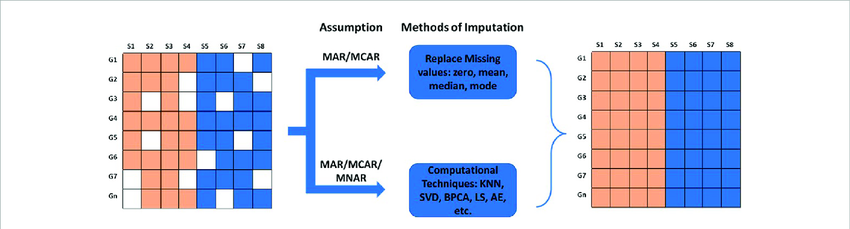


#### Types of missingness

**MCAR (Missing Completely At Random)**  
The missingness is unrelated to any data.

**MAR (Missing At Random)**  
Missingness depends on other observed variables.

**MNAR (Missing Not At Random)**  
Missingness depends on the unobserved value itself.

> Simple methods like mean/median imputation assume MCAR and can bias your analysis if the real mechanism is MAR or MNAR.

---

#### Mean vs. Median

- **Mean imputation**  
  Preserves the overall average but shrinks variance (all the filled‐in spots are identical).
- **Median imputation**  
  More robust when the distribution is skewed or has outliers (so it won’t be pulled up by a few huge values).

---

#### Mode (most frequent)

For categorical variables (e.g. ownership groups), the **mode** (most frequent value) is a natural fill.





In [ ]:
# Step 1: Remove thousand separator commas (e.g., "8,808.50" → "8808.50")
mem_dirty['HH_RENT_INC'] = mem_dirty['HH_RENT_INC'].astype(str).str.replace(r'(\d),(\d{3})', r'\1\2', regex=True)
# Step 2: Convert remaining commas to decimal points and convert to numeric (e.g., "4681,33" → 4681.33)
mem_dirty['HH_RENT_INC'] = pd.to_numeric(mem_dirty['HH_RENT_INC'].str.replace(',', '.'), errors='coerce')

In [ ]:
import matplotlib.pyplot as plt

# 1) Extract the original series as numeric (coerce any bad values to NaN)
num = pd.to_numeric(mem_dirty['HH_RENT_INC'], errors='coerce')

# 2) Compute the mean and create the imputed series
mean_exp = mem_dirty['HH_RENT_INC'].mean()
num_imp = num.fillna(mean_exp)

# (Optional) assign the imputed series back to your DataFrame
mem_dirty['HH_RENT_INC_imp'] = num_imp


In [ ]:
# HH_INVEST_INC: if there were missing values, median imputation is safer (often skewed)

med_inv = mem_dirty['HH_INVEST_INC'].median()
mem_dirty['HH_INVEST_INC'] = mem_dirty['HH_INVEST_INC'].fillna(med_inv)



**<span style="color:SeaGreen">For thought</span>**: 

- What might be the problem with using this method?
- Can you think of any other ways to fill in missing values?

The process of filling in missing data with sensible guesses is called **Data Imputation**, and is a whole field of data science in it's own right. Whilst it should obviously not be used for things like summary statistics, it can be very powerful when used as a pre-processing step for a ML algorithm, allowing you to extract much more information from your data.

### KNN Imputation Example

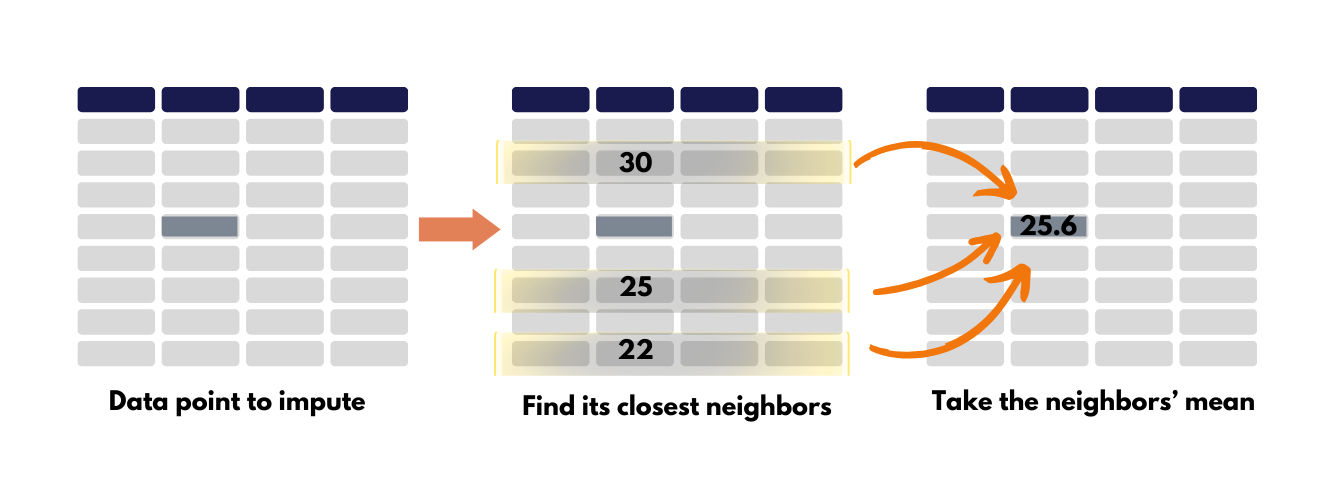

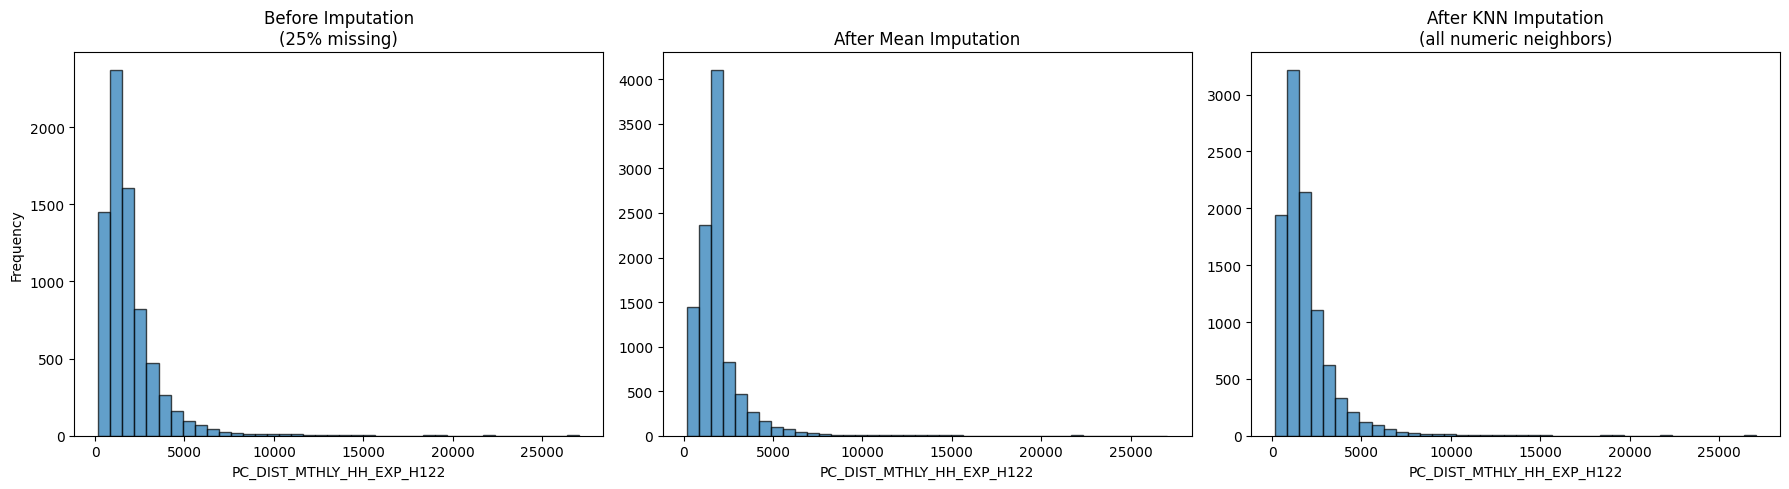

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# 1) Load data
df = pd.read_csv('../data/nus_cei.csv').copy()

# 2) Introduce 25% missingness in the target column
n_missing = int(len(df) * 0.25)
idx = np.random.choice(df.index, size=n_missing, replace=False)
df.loc[idx, 'PC_DIST_MTHLY_HH_EXP_H122'] = np.nan

# 3) Extract the “before” series
s_missing = df['PC_DIST_MTHLY_HH_EXP_H122']

# 4) Mean imputation
mean_val = s_missing.mean()
s_mean_imp = s_missing.fillna(mean_val)

# 5) KNN imputation using all numeric columns as neighbors
num_cols = df.select_dtypes(include='number').columns.tolist()
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X = df[num_cols]
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=num_cols, index=df.index)
s_knn_imp = X_imp['PC_DIST_MTHLY_HH_EXP_H122']

# 6) Plot before, after mean, and after KNN
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(s_missing.dropna(), bins=40, edgecolor='black', alpha=0.7)
plt.title('Before Imputation\n(25% missing)')
plt.xlabel('PC_DIST_MTHLY_HH_EXP_H122')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(s_mean_imp, bins=40, edgecolor='black', alpha=0.7)
plt.title('After Mean Imputation')
plt.xlabel('PC_DIST_MTHLY_HH_EXP_H122')

plt.subplot(1, 3, 3)
plt.hist(s_knn_imp, bins=40, edgecolor='black', alpha=0.7)
plt.title('After KNN Imputation\n(all numeric neighbors)')
plt.xlabel('PC_DIST_MTHLY_HH_EXP_H122')

plt.tight_layout()
plt.show()




#### Duplicates

In [ ]:
# Boolean mask of duplicate rows (marks True for all but the first occurrence)
dup_mask = mem_dirty.duplicated(keep='first')

# 1) Count how many duplicate rows exist
print("Number of duplicates:", dup_mask.sum())



Number of duplicates: 6


In [ ]:
x = mem_dirty.duplicated(keep='first').sum()
x

np.int64(6)

In [ ]:
# 2) View the actual duplicate rows
print(mem_dirty[dup_mask] )


      Unnamed: 0 Relationship_to_Household_Reference_Person Age_Category  \
30313      13351                                          1            6   
30314       6885                                          2            5   
30315       1588                                          1            5   
30316       1109                                          2            7   
30317       8980                                          5            1   
30318      21046                                          5            3   

      Marital_Status Activity_Status Highest_Qualification_Achieved  \
30313            2.0             3.0                              6   
30314            2.0             1.0                              6   
30315            2.0             1.0                              5   
30316            2.0             1.0                            nan   
30317            1.0             4.0                              9   
30318            1.0            3,00     

In [ ]:
# If you want to see duplicates including the first occurrences:
dup_all = mem_dirty.duplicated(keep=False)
#print("All entries in duplicate groups:")
#print( ais[dup_all].sort_values(list(ais.columns)) )

In [ ]:
# Drop duplicate rows, keeping the first occurrence
mem_dirty = mem_dirty.drop_duplicates()

## Grouping

Often a data set will contain natural groups, and you might wish to understand whether these groups display similar or different behaviour in other variables.

In [ ]:
mem_dirty.Singapore_Standard_Occupation_Classification_1D.unique()

array(['9', '2', nan, '5', '4', '6', '7', '9,00', '3,00', '1', '3',
       '2,00', '4,00', '1,00', '6,00', '17798.0', '7,00', '5,00', '212.0',
       '0', '33148.0', '19287.0', '2.0', '0.0', '34070.0', '25195.0',
       '99.0', '18517.0', '2061.75'], dtype=object)

In [ ]:
import pandas as pd

# 1) Define the column
col = 'Singapore_Standard_Occupation_Classification_1D'

# 2) Strip whitespace and normalize decimal commas to dots
s = (mem_dirty[col]
       .astype(str)                     # ensure it's stringy
       .str.strip()                     # remove leading/trailing spaces
       .str.replace(',', '.', regex=False)  # '9,00' → '9.00'
    )

# 3) Convert to numeric, coercing any non-parseable values to NaN
num = pd.to_numeric(s, errors='coerce')

# 4) If these are supposed to be 1-digit integer codes, keep only 0–9 integers
#    and turn everything else into <NA>
valid = num.between(0, 9) & num.notna() & num.apply(float.is_integer)
clean_int = num.where(valid, other=pd.NA).astype('Int64')

# 5) Assign back to DataFrame
mem_dirty['Singapore_Standard_Occupation_Classification_1D'] = clean_int


In [ ]:
# verify the uniques
print(mem_dirty['Singapore_Standard_Occupation_Classification_1D'].unique())


<IntegerArray>
[9, 2, <NA>, 5, 4, 6, 7, 3, 1, 0]
Length: 10, dtype: Int64


For example, we might be interested in the average of the other variables within each cohort. Pandas provides the `groupby()` method to help with computing summary statistics by group.

In [ ]:
mem_dirty.groupby('Singapore_Standard_Occupation_Classification_1D').mean(numeric_only=True)

,Household_Reference_Number,HH_RENT_INC,HH_INVEST_INC,HH_TRANSFER_INC,HH_CONTRIBUTIONS_INC,HH_OTH_TRF_INC,HH_RENT_INC_imp
Singapore_Standard_Occupation_Classification_1D,,,,,,,
0,NaN,359.600000,1013.400000,417.400000,258.400000,159.000000,359.600000
1,1.870000e+103,1510.466574,3632.260398,499.808770,254.410488,245.398282,1490.725601
2,3.603279e+06,718.091010,2460.481552,491.784048,241.521432,250.262615,719.087511
3,3.233301e+06,496.272042,2066.207746,480.826504,206.198143,274.628361,502.378307
4,3.693971e+06,357.128866,1393.504670,467.899933,172.528019,295.371915,368.883466
5,7.243101e+06,306.078481,1313.847291,516.830049,201.125616,315.704433,318.311463
6,3.225960e+06,190.813291,1191.419855,489.322647,175.416753,313.905895,201.949481
7,5.240301e+06,368.187608,1375.402685,634.778523,217.079698,417.698826,377.987921
9,9.842105e+102,873.602436,2334.645388,839.166656,331.708755,507.457901,870.509513


This graphic explains what's going on under the hood when you call `groupby(...).mean()`:

![image.png](03.08-split-apply-combine.png)

When you call `.groupby('Singapore_Standard_Occupation_Classification_1D')`, pandas creates a new data frame for each value of `Singapore_Standard_Occupation_Classification_1D`, each consisting exclusively of the data from that cohort.

`.mean()` then computes the mean of each variable within each of these data frames, before stacking all the (now 1 row) data frames and returning this to you.


In [ ]:
# 1. Median HH_TRANSFER_INC by Singapore_Standard_Occupation_Classification_1D
mem_dirty.groupby('Singapore_Standard_Occupation_Classification_1D')['HH_TRANSFER_INC'].median().round(1)

Singapore_Standard_Occupation_Classification_1D
0      0.0
1      0.0
2      0.0
3     18.0
4    107.5
5    199.5
6    202.0
7    349.5
9    260.0
Name: HH_TRANSFER_INC, dtype: float64

In [ ]:
# 2. Mean Rental Income by Singapore_Standard_Occupation_Classification_1D
mem_dirty.groupby('Singapore_Standard_Occupation_Classification_1D')['HH_RENT_INC'].mean().round(1)




Singapore_Standard_Occupation_Classification_1D
0     359.6
1    1510.5
2     718.1
3     496.3
4     357.1
5     306.1
6     190.8
7     368.2
9     873.6
Name: HH_RENT_INC, dtype: float64

In [ ]:
# 3. Mean AND Median HH_TRANSFER_INC by Singapore_Standard_Occupation_Classification_1D
mem_dirty.groupby('Singapore_Standard_Occupation_Classification_1D')['HH_TRANSFER_INC'].agg(['mean', 'median'])


,mean,median
Singapore_Standard_Occupation_Classification_1D,,
0,417.400000,0.0
1,499.808770,0.0
2,491.784048,0.0
3,480.826504,18.0
4,467.899933,107.5
5,516.830049,199.5
6,489.322647,202.0
7,634.778523,349.5
9,839.166656,260.0


In [ ]:
mem_dirty.SEX.unique()

array(['2.0', '1.0', '1,00', '2,00', nan, '2', '5.0', '2480.78', '0,00',
       '6', '17270', '1', '0', '99.0', '3'], dtype=object)

In [ ]:
import pandas as pd

# 1) Define a mapping from all the valid “1”/“2” variants to “Male”/“Female”
mapping = {
    '1':     'Male',  '1.0':   'Male',  '1,00':  'Male',
    '2':     'Female','2.0':   'Female','2,00': 'Female'
}

# 2) Clean the raw SEX column:
cleaned_sex = (
    mem_dirty['SEX']
      .astype(str)            # make NaNs into the string "nan"
      .str.strip()            # drop whitespace
      .replace(',', '.', regex=False)  # normalize comma‐decimals: "1,00"→"1.00"
      .replace(to_replace=mapping)     # map the valid codes → labels
)

# 3) Anything not mapped to Male/Female becomes <NA>
mem_dirty['SEX'] = cleaned_sex.where(
    cleaned_sex.isin(['Male','Female']),
    pd.NA
)

# 4) Check your result
print(mem_dirty['SEX'].unique())
# → ['Female', 'Male', <NA>]



['Female' 'Male' <NA>]


In [ ]:
# 4. Group by multiple categorical variables
df_grouped = (
    mem_dirty
      .groupby(['Singapore_Standard_Occupation_Classification_1D','SEX'])['HH_TRANSFER_INC']
      .mean()
)
print(df_grouped)


Singapore_Standard_Occupation_Classification_1D  SEX   
0                                                Female    521.750000
                                                 Male        0.000000
1                                                Female    643.216535
                                                 Male      415.659420
2                                                Female    487.108539
                                                 Male      492.648975
3                                                Female    509.912234
                                                 Male      453.172816
4                                                Female    450.883943
                                                 Male      489.962355
5                                                Female    600.120690
                                                 Male      465.907186
6                                                Female    425.732143
                                  

## Merging Data Sets

Often the information you need is spread across multiple data sets. Sometimes it is practical to deal with the data sets as seperate data frames, but often it's easier to join them together. Pandas provides lots of useful functionality to help with this.

### Merging Data Sets

In [ ]:
# Loading the data

mem = pd.read_csv('../data/nus_mem.csv')

cei = pd.read_csv('../data/nus_cei_corrupted.csv', 
                       skiprows=2,        # Skip first 2 comment lines
                       engine='python',   # Better handling of quotes
                       on_bad_lines='skip') # Skip any remaining bad lines

In [ ]:
# Get column names
print("Columns:")
print(mem.columns.tolist())



Columns:
['Unnamed: 0', 'RELT_TO_HD', 'AGE', 'MARITAL_ST', 'ACTIVITY_ST', 'HQA', 'LVL_OF_EDN', 'SSOC_1D', 'ID_TYPE', 'TENANCY', 'HSE_TYPE', 'NUM_MAID', 'EMPLOYMENT_ST', 'HREF_NO', 'PI_NO', 'SP_PI_NO', 'MO_PI_NO', 'FA_PI_NO', 'EXPN_FAC', 'SEX', 'MIE_EXC_NAV_IND', 'HSZ', 'NUM_WRK_PERS_INC_STUD', 'RETIREE60_HH', 'RETIREE65_HH', 'HLA', 'HH_YNGCH', '_DRBLE01', '_DRBLE12', '_DRBLE13', '_DRBLE16', '_DRBLE34', '_DRBLE19', '_DRBLE20', '_DRBLE35', '_DRBLE26_27_28', '_DRBLE40', '_DRBLE06', '_DRBLE39', '_DRBLE07', '_DRBLE08', '_DRBLE09', '_DRBLE10_41', '_DRBLE29_41', '_DRBLE41', '_DRBLE11', '_DRBLE38', '_DRBLE15', '_DRBLE21', '_DRBLE32', '_DRBLE36', '_DRBLE37', 'HH_TINC_RCPF_GTRF_E_NAV', 'HH_TINC_GTRF_E_NAV', 'PC_HH_TINC_RCPF_GTRF_E_NAV', 'PC_HH_TINC_GTRF_E_NAV', 'HH_WRK_INC_RCPF', 'PC_HH_WRK_INC_RCPF', 'HH_PAID_EMP_INC_RCPF', 'HH_SELF_EMP_INC', 'HH_RENT_INC', 'HH_INVEST_INC', 'HH_GOVT_INC', 'HH_TRANSFER_INC', 'HH_CONTRIBUTIONS_INC', 'HH_OTH_TRF_INC', 'MS_INC_E_NAV_GRP']


In [ ]:

print("CEI Columns:")
#print(cei.columns.tolist())

CEI Columns:


In [ ]:
# Dropping columns
cei = cei.drop('Unnamed: 0', axis=1)

In [ ]:
### Checking unique values in Household_Reference_Number 

#cei.Household_Reference_Number.unique()
mem.HREF_NO.unique()

array(['06E4201', 'SJOB001', '0NLTZ01', ..., 'HX7RL01', 'A04PE01',
       'M8T3J01'], shape=(9976,), dtype=object)

In [1]:
# cei.HREF_NO.unique().tolist()

We might wish to combine this with the other data in metabric. The function for this is `pd.merge()`:

In [ ]:
cei['HREF_NO'] = cei['HREF_NO'].astype(str).str.strip().str.upper()

In [ ]:
# Merge on the one key
merged = pd.merge(
    cei,
    mem,
    on='HREF_NO',
    how='inner',                # or 'left' if you want all CEI rows + matching MEM
    suffixes=('_CEI', '_DEM')   # in case any column names overlap
)


In [ ]:
import pandas as pd

# 1) Outer‐merge with an indicator
merged_all = pd.merge(
    cei,
    mem,
    on='HREF_NO',
    how='outer',
    indicator=True,
    suffixes=('_CEI','_DEM')
)

# Count CEI-only IDs
count_only_cei = merged_all.loc[merged_all['_merge'] == 'left_only', 'HREF_NO'].nunique()
print(f"Number of CEI-only IDs: {count_only_cei}")

# Count mem_dirty-only IDs
count_only_dem = merged_all.loc[merged_all['_merge'] == 'right_only', 'HREF_NO'].nunique()
print(f"Number of MEM-only IDs: {count_only_dem}")



Number of CEI-only IDs: 140
Number of MEM-only IDs: 268


In [ ]:
# If you has two variables to merge on, here is the code:
# df = pd.merge(ais, ceis, on=['Reference_Year', 'Entity_Number']  # This will keep only one copy of REF_YR and UEN)

### Concatenating Data Sets

In this case we would like to "stack" the data frames on top of each other. The function to do this is `pd.concat()`.

In [ ]:
import pandas as pd

# --- Create two small DataFrames ---
df1 = pd.DataFrame({
    'Entity': ['A', 'B'],
    'Revenue': [100, 200]
})

df2 = pd.DataFrame({
    'Entity': ['C', 'D'],
    'Revenue': [300, 400]
})


# --- 1) Row-wise concatenation (stack one on top of the other) ---
df_rows = pd.concat([df1, df2], ignore_index=True)
print("\nAfter row-concat (ignore_index=True):")
print(df_rows)


# --- 2) Column-wise concatenation (side by side) ---
#    Note: indices should align meaningfully
df_cols = pd.concat([df1, df2], axis=1)
print("\nAfter column-concat (axis=1):")
print(df_cols)



After row-concat (ignore_index=True):
  Entity  Revenue
0      A      100
1      B      200
2      C      300
3      D      400

After column-concat (axis=1):
  Entity  Revenue Entity  Revenue
0      A      100      C      300
1      B      200      D      400


#### Pivoting

In [ ]:

mem_dirty.Singapore_Standard_Occupation_Classification_1D.unique()

<IntegerArray>
[9, 2, <NA>, 5, 4, 6, 7, 3, 1, 0]
Length: 10, dtype: Int64

In [ ]:
import pandas as pd


# 1) Grab just the columns we need and drop any missing
sub = mem_dirty[['Singapore_Standard_Occupation_Classification_1D','SEX','HH_INVEST_INC']].dropna()

# 2) Pivot: rows = SSOC, columns = SEX, values = HH_INVEST_INC
wide_rev = sub.pivot_table(
    index='Singapore_Standard_Occupation_Classification_1D',
    columns='SEX',
    values='HH_INVEST_INC',
    aggfunc='mean',       # or 'mean', 'max', etc.
#    fill_value=0         # optional: replace missing with 0
)

pd.options.display.float_format = '{:,.0f}'.format

print(wide_rev)


SEX                                              Female  Male
Singapore_Standard_Occupation_Classification_1D              
0                                                 1,166   401
1                                                 3,582 3,669
2                                                 2,471 2,447
3                                                 2,132 1,990
4                                                 1,440 1,315
5                                                 1,129 1,349
6                                                 1,202 1,189
7                                                 1,175 1,520
9                                                 2,362 2,296


#### Outliers

In [ ]:
mem_dirty.describe()

,Singapore_Standard_Occupation_Classification_1D,Household_Reference_Number,HH_RENT_INC,HH_INVEST_INC,HH_TRANSFER_INC,HH_CONTRIBUTIONS_INC,HH_OTH_TRF_INC,HH_RENT_INC_imp
count,"29,519",68,"29,526","30,313","30,313","30,313","30,313","30,313"
mean,6,"6,874,999,999,999,999,018,523,793,394,852,563,2...",757,"2,229",670,273,396,757
std,3,"24,585,272,712,100,595,211,117,405,108,732,656,...","3,316","6,775","1,350",811,"1,007","3,272"
min,0,"63,420",0,0,0,0,0,0
25%,3,"2,044,001",0,668,0,0,0,0
50%,9,"3,126,801",0,"1,238",96,0,7,0
75%,9,"6,433,701",0,"2,209",871,202,445,0
max,9,"93,499,999,999,999,997,791,964,085,749,215,644,...","75,323","258,350","29,786","19,190","29,786","75,323"


In [ ]:
# Flag HH_TRANSFER_INC outliers using 1.5×IQR rule 
s = mem_dirty['HH_TRANSFER_INC']

# compute Q1, Q3 and IQR only once
q1, q3 = s.quantile([.25, .75])
iqr = q3 - q1

# flag outliers in one vectorized step
outliers1 = s[~s.between(q1 - 1.5*iqr,
                        q3 + 1.5*iqr)]

# Flag HH_INVEST_INC outliers using 1.5×IQR rule 
# Pre-extract the series
s2 = mem_dirty['HH_INVEST_INC'].astype(float)

# Compute Q1, Q3, and IQR once
q1, q3 = s2.quantile([.25, .75])
iqr = q3 - q1

# Flag outliers in one go
outliers2 = s2[~s2.between(q1 - 1.5*iqr,
                          q3 + 1.5*iqr)]

# Display them
print(outliers2)



152      6,494
153      6,494
154      6,494
155      6,494
161      5,757
         ...  
30245    5,861
30252    6,038
30254    5,636
30275    5,721
30302   10,276
Name: HH_INVEST_INC, Length: 2329, dtype: float64


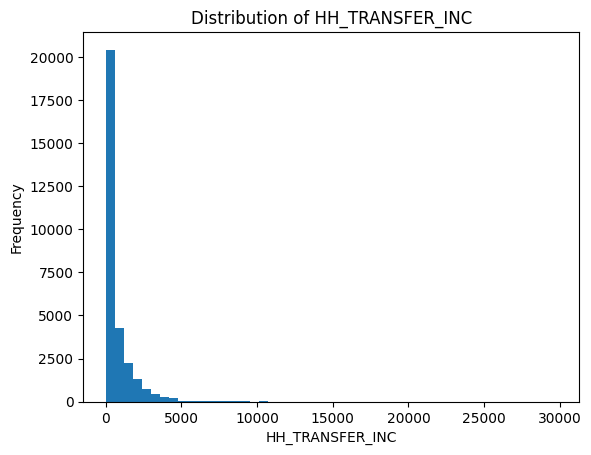

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 1) Histogram 
plt.figure()  
plt.hist(mem_dirty['HH_TRANSFER_INC'].dropna(), bins=50)  
plt.title('Distribution of HH_TRANSFER_INC')  
plt.xlabel('HH_TRANSFER_INC')  
plt.ylabel('Frequency')  
plt.show()




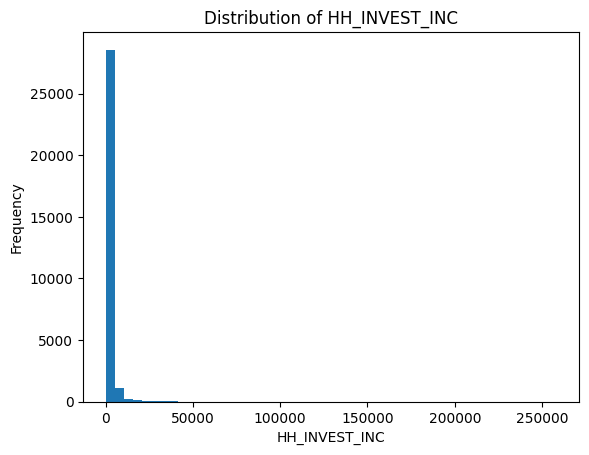

In [ ]:
# 2) Histogram for HH_INVEST_INC
plt.figure()  
plt.hist(mem_dirty['HH_INVEST_INC'].dropna(), bins=50)  
plt.title('Distribution of HH_INVEST_INC')  
plt.xlabel('HH_INVEST_INC')  
plt.ylabel('Frequency')  
plt.show()

In [ ]:
# Keep only rows within the specified thresholds
mem_dirty = mem_dirty[mem_dirty['HH_TRANSFER_INC'] <= 10000]
mem_dirty = mem_dirty[mem_dirty['HH_INVEST_INC'] <= 100000]
